In [7]:
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import toeplitz
import sys
sys.path.append('..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


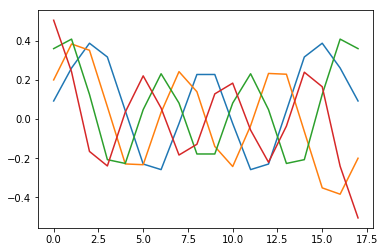

In [8]:
h = np.squeeze(np.load("../data/filters/H_4_orth.npy"))
plt.plot(h)

In [9]:
import numpy as np
from scipy.linalg import toeplitz
def create_toeplitz_1d(h,input_dim):
    dictionary_dim = h.shape[0]
    num_conv = h.shape[1]
    padding = np.zeros(input_dim-1)
    temp = np.concatenate([padding,h[:,0],padding],axis=0)
    H = toeplitz(temp)
    H = H[-input_dim-dictionary_dim+1:,:(input_dim)]
    for n in range(1,num_conv):
        temp = np.concatenate([padding,h[:,n],padding],axis=0)
        H_n = toeplitz(temp)
        H_n = H_n[-input_dim-dictionary_dim+1:,:(input_dim)]
        H = np.concatenate([H,H_n],axis=1)
    return H

# estimate largest eigenvalue of HTH
def estimate_L(h,input_dim):
    H = create_toeplitz_1d(h,input_dim)
    HTH = np.dot(H.T,H)
    return np.ceil(max(np.abs(np.linalg.eigvals(HTH))))

In [10]:
estimate_L(h,1000)

18.0